# **1. 데이터 처리 및 탐색적 분석(EDA)**


> **1.1. Kaggle 데이터 가져오기**






In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rsj0113","key":"1f5e77aa00bc097e8469bd4f7f59567f"}'}

In [ ]:
# 파일이 제대로 업로드 됐는지 확인
!ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 파일 가져오기
!kaggle competitions download -c home-credit-default-risk

100% 36.0M/36.1M [00:00<00:00, 48.4MB/s]
100% 36.1M/36.1M [00:00<00:00, 56.9MB/s]
 86% 49.0M/56.8M [00:00<00:00, 78.4MB/s]
100% 56.8M/56.8M [00:00<00:00, 104MB/s] 
 88% 96.0M/109M [00:00<00:00, 112MB/s] 
100% 109M/109M [00:00<00:00, 121MB/s] 
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 177MB/s]
 91% 88.0M/96.7M [00:00<00:00, 108MB/s] 
100% 96.7M/96.7M [00:00<00:00, 124MB/s]
  0% 0.00/5.81M [00:00<?, ?B/s]
100% 5.81M/5.81M [00:00<00:00, 48.8MB/s]
 84% 31.0M/36.8M [00:00<00:00, 70.1MB/s]
100% 36.8M/36.8M [00:00<00:00, 98.3MB/s]
 98% 266M/271M [00:02<00:00, 148MB/s]
100% 271M/271M [00:02<00:00, 131MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 39.5MB/s]
 94% 72.0M/76.3M [00:00<00:00, 98.3MB/s]
100% 76.3M/76.3M [00:00<00:00, 97.7MB/s]


In [ ]:
# 업로드 파일 리스트
!ls

application_test.csv.zip	    installments_payments.csv.zip
application_train.csv.zip	    kaggle.json
bureau_balance.csv.zip		    POS_CASH_balance.csv.zip
bureau.csv.zip			    previous_application.csv.zip
credit_card_balance.csv.zip	    sample_data
HomeCredit_columns_description.csv  sample_submission.csv


In [ ]:
# 파일 압축풀기
!unzip application_train.csv.zip

Archive:  application_train.csv.zip
  inflating: application_train.csv   


In [ ]:
!unzip application_test.csv.zip

Archive:  application_test.csv.zip
  inflating: application_test.csv    


In [ ]:
!unzip bureau.csv.zip

Archive:  bureau.csv.zip
  inflating: bureau.csv              


In [ ]:
!unzip bureau_balance.csv.zip

Archive:  bureau_balance.csv.zip
  inflating: bureau_balance.csv      



>  **1.2. Pandas 데이터프레임 생성 및 데이터 구조 파악 (train, test, bureau, bureau_balance)**



In [ ]:
# train 데이터
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('application_train.csv')
print('Training data 구조: ', train.shape)
train.head()
# SK_ID_CURR : loan Key값

Training data 구조:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# train 데이터 columns : 122개
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# test 데이터 
test = pd.read_csv('application_test.csv')
print('Testing data 구조: ', test.shape)
test.head()
# SK_ID_CURR (loan Key값)
# 121개 columns, train data보다 feature 한 개 부족 (target만 미존재)

Testing data 구조:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# bureau : 신용 조사 기관 데이터
bureau = pd.read_csv('bureau.csv')
bureau.head()
# SK_ID_CURR (loan Key값)
# SK_ID_BUREAU (CB사 key 값) : Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
# bureau_balance : 신용 조사 기관 월별 잔액 데이터
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()
# SK_ID_BUREAU (CB사 key 값)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def kde_target(var_name, df):
    corr = df['TARGET'].corr(df[var_name])
    
    avg_repaid = df[df['TARGET'] == 0][var_name].median()
    avg_not_repaid = df[df['TARGET'] == 1][var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    sns.kdeplot(df[df['TARGET'] == 0][var_name], label = 'TARGET == 0')
    sns.kdeplot(df[df['TARGET'] == 1][var_name], label = 'TARGET == 1')
    
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    print('Target correlation : %0.4f' % corr)
    print('Median (Target == 1) : %0.4f' % avg_not_repaid)
    print('Median (Target == 0) : %0.4f' % avg_repaid)
    

> **1.3. Feature Engineering** 

train : key (SK_ID_CURR distinct)

test : key (SK_ID_CURR distinct)

bureau : key (SK_ID_BUREAU distinct), SK_ID_CURR 중복

bureau_balance : SK_ID_BUREAU 중복

**Train, Test set에 bureau 와 bureau_balance 데이터를 Merge 하기 위해서 SK_ID_CURR 기준으로 요약정보 생성하기**





> 1.3.1. Bureau 숫자형 데이터 요약정보 생성



In [ ]:
# bureau 테이블 컬럼 확인
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [ ]:
# SK_ID_CURR 기준으로 group by 하여 bureau 테이블 요약항목 생성 (count, mean, max, min, sum)
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                    ...  AMT_ANNUITY                       
                   count         mean  max  ...         mean      max  min      sum
0     100001           7  -735.000000  -49  ...  3545.357143  10822.5  0.0  24817.5
1     100002           8  -874.000000 -103  ...     0.000000      0.0  0.0      0.0
2     100003           4 -1400.750000 -606  ...          NaN      NaN  NaN      0.0
3     100004           2  -867.000000 -408  ...          NaN      NaN  NaN      0.0
4     100005           3  -190.666667  -62  ...  1420.500000   4261.5  0.0   4261.5

[5 rows x 61 columns]

In [ ]:
# multi column 단일화
bureau_agg.columns = list(map(lambda x: '_bureau_'.join(x[0:]),bureau_agg.columns))
bureau_agg.rename(columns = {'SK_ID_CURR_bureau_' : 'SK_ID_CURR'}, inplace = True) 

In [ ]:
bureau_agg.head()

,SK_ID_CURR,DAYS_CREDIT_bureau_count,DAYS_CREDIT_bureau_mean,DAYS_CREDIT_bureau_max,DAYS_CREDIT_bureau_min,DAYS_CREDIT_bureau_sum,CREDIT_DAY_OVERDUE_bureau_count,CREDIT_DAY_OVERDUE_bureau_mean,CREDIT_DAY_OVERDUE_bureau_max,CREDIT_DAY_OVERDUE_bureau_min,CREDIT_DAY_OVERDUE_bureau_sum,DAYS_CREDIT_ENDDATE_bureau_count,DAYS_CREDIT_ENDDATE_bureau_mean,DAYS_CREDIT_ENDDATE_bureau_max,DAYS_CREDIT_ENDDATE_bureau_min,DAYS_CREDIT_ENDDATE_bureau_sum,DAYS_ENDDATE_FACT_bureau_count,DAYS_ENDDATE_FACT_bureau_mean,DAYS_ENDDATE_FACT_bureau_max,DAYS_ENDDATE_FACT_bureau_min,DAYS_ENDDATE_FACT_bureau_sum,AMT_CREDIT_MAX_OVERDUE_bureau_count,AMT_CREDIT_MAX_OVERDUE_bureau_mean,AMT_CREDIT_MAX_OVERDUE_bureau_max,AMT_CREDIT_MAX_OVERDUE_bureau_min,AMT_CREDIT_MAX_OVERDUE_bureau_sum,CNT_CREDIT_PROLONG_bureau_count,CNT_CREDIT_PROLONG_bureau_mean,CNT_CREDIT_PROLONG_bureau_max,CNT_CREDIT_PROLONG_bureau_min,CNT_CREDIT_PROLONG_bureau_sum,AMT_CREDIT_SUM_bureau_count,AMT_CREDIT_SUM_bureau_mean,AMT_CREDIT_SUM_bureau_max,AMT_CREDIT_SUM_bureau_min,AMT_CREDIT_SUM_bureau_sum,AMT_CREDIT_SUM_DEBT_bureau_count,AMT_CREDIT_SUM_DEBT_bureau_mean,AMT_CREDIT_SUM_DEBT_bureau_max,AMT_CREDIT_SUM_DEBT_bureau_min,AMT_CREDIT_SUM_DEBT_bureau_sum,AMT_CREDIT_SUM_LIMIT_bureau_count,AMT_CREDIT_SUM_LIMIT_bureau_mean,AMT_CREDIT_SUM_LIMIT_bureau_max,AMT_CREDIT_SUM_LIMIT_bureau_min,AMT_CREDIT_SUM_LIMIT_bureau_sum,AMT_CREDIT_SUM_OVERDUE_bureau_count,AMT_CREDIT_SUM_OVERDUE_bureau_mean,AMT_CREDIT_SUM_OVERDUE_bureau_max,AMT_CREDIT_SUM_OVERDUE_bureau_min,AMT_CREDIT_SUM_OVERDUE_bureau_sum,DAYS_CREDIT_UPDATE_bureau_count,DAYS_CREDIT_UPDATE_bureau_mean,DAYS_CREDIT_UPDATE_bureau_max,DAYS_CREDIT_UPDATE_bureau_min,DAYS_CREDIT_UPDATE_bureau_sum,AMT_ANNUITY_bureau_count,AMT_ANNUITY_bureau_mean,AMT_ANNUITY_bureau_max,AMT_ANNUITY_bureau_min,AMT_ANNUITY_bureau_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,0,7,82.428571,1778.0,-1329.0,577.0,4,-825.500000,-544.0,-1328.0,-3302.0,0,NaN,NaN,NaN,0.000,7,0.0,0,0,0,7,207623.571429,378000.0,85500.0,1453365.000,7,85240.928571,373239.0,0.0,596686.5,6,0.00000,0.000,0.0,0.000,7,0.0,0.0,0.0,0.0,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,0,6,-349.000000,780.0,-1072.0,-2094.0,6,-697.500000,-36.0,-1185.0,-4185.0,5,1681.029,5043.645,0.0,8405.145,8,0.0,0,0,0,8,108131.945625,450000.0,0.0,865055.565,5,49156.200000,245781.0,0.0,245781.0,4,7997.14125,31988.565,0.0,31988.565,8,0.0,0.0,0.0,0.0,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,0,4,-544.500000,1216.0,-2434.0,-2178.0,3,-1097.333333,-540.0,-2131.0,-3292.0,4,0.000,0.000,0.0,0.000,4,0.0,0,0,0,4,254350.125000,810000.0,22248.0,1017400.500,4,0.000000,0.0,0.0,0.0,4,202500.00000,810000.000,0.0,810000.000,4,0.0,0.0,0.0,0.0,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,0,2,-488.500000,-382.0,-595.0,-977.0,2,-532.500000,-382.0,-683.0,-1065.0,1,0.000,0.000,0.0,0.000,2,0.0,0,0,0,2,94518.900000,94537.8,94500.0,189037.800,2,0.000000,0.0,0.0,0.0,2,0.00000,0.000,0.0,0.000,2,0.0,0.0,0.0,0.0,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,0,3,439.333333,1324.0,-128.0,1318.0,1,-123.000000,-123.0,-123.0,-123.0,1,0.000,0.000,0.0,0.000,3,0.0,0,0,0,3,219042.000000,568800.0,29826.0,657126.000,3,189469.500000,543087.0,0.0,568408.5,3,0.00000,0.000,0.0,0.000,3,0.0,0.0,0.0,0.0,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [ ]:
# train_m1 : train & bureau_agg
train_m1 = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
test_m1 = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
print('train_m1 data 구조: ', train_m1.shape)
train_m1.head()
# Training data 구조:  (307511, 122) : dup 없음

train_m1 data 구조:  (307511, 182)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,AMT_CREDIT_MAX_OVERDUE_bureau_count,AMT_CREDIT_MAX_OVERDUE_bureau_mean,AMT_CREDIT_MAX_OVERDUE_bureau_max,AMT_CREDIT_MAX_OVERDUE_bureau_min,AMT_CREDIT_MAX_OVERDUE_bureau_sum,CNT_CREDIT_PROLONG_bureau_count,CNT_CREDIT_PROLONG_bureau_mean,CNT_CREDIT_PROLONG_bureau_max,CNT_CREDIT_PROLONG_bureau_min,CNT_CREDIT_PROLONG_bureau_sum,AMT_CREDIT_SUM_bureau_count,AMT_CREDIT_SUM_bureau_mean,AMT_CREDIT_SUM_bureau_max,AMT_CREDIT_SUM_bureau_min,AMT_CREDIT_SUM_bureau_sum,AMT_CREDIT_SUM_DEBT_bureau_count,AMT_CREDIT_SUM_DEBT_bureau_mean,AMT_CREDIT_SUM_DEBT_bureau_max,AMT_CREDIT_SUM_DEBT_bureau_min,AMT_CREDIT_SUM_DEBT_bureau_sum,AMT_CREDIT_SUM_LIMIT_bureau_count,AMT_CREDIT_SUM_LIMIT_bureau_mean,AMT_CREDIT_SUM_LIMIT_bureau_max,AMT_CREDIT_SUM_LIMIT_bureau_min,AMT_CREDIT_SUM_LIMIT_bureau_sum,AMT_CREDIT_SUM_OVERDUE_bureau_count,AMT_CREDIT_SUM_OVERDUE_bureau_mean,AMT_CREDIT_SUM_OVERDUE_bureau_max,AMT_CREDIT_SUM_OVERDUE_bureau_min,AMT_CREDIT_SUM_OVERDUE_bureau_sum,DAYS_CREDIT_UPDATE_bureau_count,DAYS_CREDIT_UPDATE_bureau_mean,DAYS_CREDIT_UPDATE_bureau_max,DAYS_CREDIT_UPDATE_bureau_min,DAYS_CREDIT_UPDATE_bureau_sum,AMT_ANNUITY_bureau_count,AMT_ANNUITY_bureau_mean,AMT_ANNUITY_bureau_max,AMT_ANNUITY_bureau_min,AMT_ANNUITY_bureau_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,5.0,1681.029,5043.645,0.0,8405.145,8.0,0.0,0.0,0.0,0.0,8.0,108131.945625,450000.0,0.0,865055.565,5.0,49156.2,245781.0,0.0,245781.0,4.0,7997.14125,31988.565,0.0,31988.565,8.0,0.0,0.0,0.0,0.0,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,4.0,0.000,0.000,0.0,0.000,4.0,0.0,0.0,0.0,0.0,4.0,254350.125000,810000.0,22248.0,1017400.500,4.0,0.0,0.0,0.0,0.0,4.0,202500.00000,810000.000,0.0,810000.000,4.0,0.0,0.0,0.0,0.0,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,1.0,0.000,0.000,0.0,0.000,2.0,0.0,0.0,0.0,0.0,2.0,94518.900000,94537.8,94500.0,189037.800,2.0,0.0,0.0,0.0,0.0,2.0,0.00000,0.000,0.0,0.000,2.0,0.0,0.0,0.0,0.0,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,

In [ ]:
# 새로 생성한 데이터와 target간의 correlation 확인
new_corrs = []

for col in bureau_agg.columns.drop(['SK_ID_CURR']):
    corr = train_m1['TARGET'].corr(train_m1[col])
    new_corrs.append((col, corr))

In [ ]:
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:10]

[('DAYS_CREDIT_bureau_mean', 0.08972896721998114),
 ('DAYS_CREDIT_bureau_min', 0.0752482510301036),
 ('DAYS_CREDIT_UPDATE_bureau_mean', 0.06892735266968673),
 ('DAYS_ENDDATE_FACT_bureau_min', 0.05588737984392077),
 ('DAYS_CREDIT_ENDDATE_bureau_sum', 0.0537348956010205),
 ('DAYS_ENDDATE_FACT_bureau_mean', 0.05319962585758616),
 ('DAYS_CREDIT_bureau_max', 0.04978205463997299),
 ('DAYS_ENDDATE_FACT_bureau_sum', 0.048853502611115894),
 ('DAYS_CREDIT_ENDDATE_bureau_mean', 0.046982754334835494),
 ('DAYS_CREDIT_UPDATE_bureau_min', 0.042863922470730155)]

Target correlation : 0.0897
Median (Target == 1) : -835.3333
Median (Target == 0) : -1067.0000


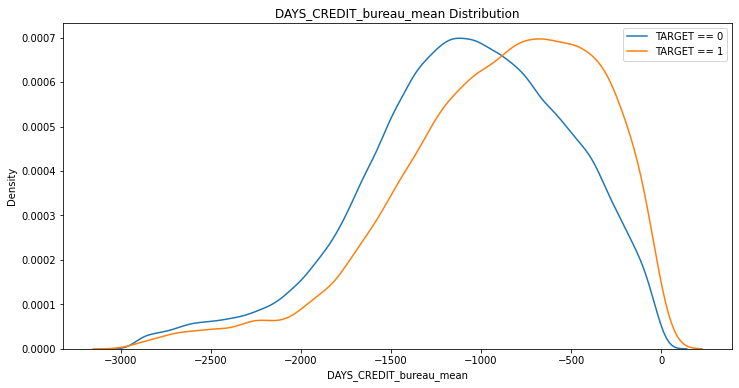

In [ ]:
kde_target('DAYS_CREDIT_bureau_mean', train_m1)



> 1.3.2. Bureau 문자형 데이터 요약정보 생성



In [ ]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,215354


In [ ]:
bureau_categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
bureau_categorical_grouped.head()

CREDIT_ACTIVE_Active            ... CREDIT_TYPE_Unknown type of loan     
                            sum      mean  ...                              sum mean
SK_ID_CURR                                 ...                                      
100001                        3  0.428571  ...                                0  0.0
100002                        2  0.250000  ...                                0  0.0
100003                        1  0.250000  ...                                0  0.0
100004                        0  0.000000  ...                                0  0.0
100005                        2  0.666667  ...                                0  0.0

[5 rows x 46 columns]

In [ ]:
bureau_categorical_grouped.columns = list(map(lambda x: '_bureau_'.join(x[0:]),bureau_categorical_grouped.columns))
bureau_categorical_grouped.rename(columns = {'SK_ID_CURR_bureau_' : 'SK_ID_CURR'}, inplace = True) 

In [ ]:
bureau_categorical_grouped.head()

,CREDIT_ACTIVE_Active_bureau_sum,CREDIT_ACTIVE_Active_bureau_mean,CREDIT_ACTIVE_Bad debt_bureau_sum,CREDIT_ACTIVE_Bad debt_bureau_mean,CREDIT_ACTIVE_Closed_bureau_sum,CREDIT_ACTIVE_Closed_bureau_mean,CREDIT_ACTIVE_Sold_bureau_sum,CREDIT_ACTIVE_Sold_bureau_mean,CREDIT_CURRENCY_currency 1_bureau_sum,CREDIT_CURRENCY_currency 1_bureau_mean,CREDIT_CURRENCY_currency 2_bureau_sum,CREDIT_CURRENCY_currency 2_bureau_mean,CREDIT_CURRENCY_currency 3_bureau_sum,CREDIT_CURRENCY_currency 3_bureau_mean,CREDIT_CURRENCY_currency 4_bureau_sum,CREDIT_CURRENCY_currency 4_bureau_mean,CREDIT_TYPE_Another type of loan_bureau_sum,CREDIT_TYPE_Another type of loan_bureau_mean,CREDIT_TYPE_Car loan_bureau_sum,CREDIT_TYPE_Car loan_bureau_mean,CREDIT_TYPE_Cash loan (non-earmarked)_bureau_sum,CREDIT_TYPE_Cash loan (non-earmarked)_bureau_mean,CREDIT_TYPE_Consumer credit_bureau_sum,CREDIT_TYPE_Consumer credit_bureau_mean,CREDIT_TYPE_Credit card_bureau_sum,CREDIT_TYPE_Credit card_bureau_mean,CREDIT_TYPE_Interbank credit_bureau_sum,CREDIT_TYPE_Interbank credit_bureau_mean,CREDIT_TYPE_Loan for business development_bureau_sum,CREDIT_TYPE_Loan for business development_bureau_mean,CREDIT_TYPE_Loan for purchase of shares (margin lending)_bureau_sum,CREDIT_TYPE_Loan for purchase of shares (margin lending)_bureau_mean,CREDIT_TYPE_Loan for the purchase of equipment_bureau_sum,CREDIT_TYPE_Loan for the purchase of equipment_bureau_mean,CREDIT_TYPE_Loan for working capital replenishment_bureau_sum,CREDIT_TYPE_Loan for working capital replenishment_bureau_mean,CREDIT_TYPE_Microloan_bureau_sum,CREDIT_TYPE_Microloan_bureau_mean,CREDIT_TYPE_Mobile operator loan_bureau_sum,CREDIT_TYPE_Mobile operator loan_bureau_mean,CREDIT_TYPE_Mortgage_bureau_sum,CREDIT_TYPE_Mortgage_bureau_mean,CREDIT_TYPE_Real estate loan_bureau_sum,CREDIT_TYPE_Real estate loan_bureau_mean,CREDIT_TYPE_Unknown type of loan_bureau_sum,CREDIT_TYPE_Unknown type of loan_bureau_mean
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,7,1.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,4,0.500000,4,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.500000,2,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,1.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.666667,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [ ]:
# train_m2 : train & bureau_agg & bureau_categorical_grouped
train_m2 = train_m1.merge(bureau_categorical_grouped, on = 'SK_ID_CURR', how = 'left')
test_m2 = test_m1.merge(bureau_categorical_grouped, on = 'SK_ID_CURR', how = 'left')
print('train_m2 data 구조: ', train_m2.shape)
train_m2.head()
# Training data 구조:  (307511, 122) : dup 없음

train_m2 data 구조:  (307511, 228)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,CREDIT_ACTIVE_Sold_bureau_sum,CREDIT_ACTIVE_Sold_bureau_mean,CREDIT_CURRENCY_currency 1_bureau_sum,CREDIT_CURRENCY_currency 1_bureau_mean,CREDIT_CURRENCY_currency 2_bureau_sum,CREDIT_CURRENCY_currency 2_bureau_mean,CREDIT_CURRENCY_currency 3_bureau_sum,CREDIT_CURRENCY_currency 3_bureau_mean,CREDIT_CURRENCY_currency 4_bureau_sum,CREDIT_CURRENCY_currency 4_bureau_mean,CREDIT_TYPE_Another type of loan_bureau_sum,CREDIT_TYPE_Another type of loan_bureau_mean,CREDIT_TYPE_Car loan_bureau_sum,CREDIT_TYPE_Car loan_bureau_mean,CREDIT_TYPE_Cash loan (non-earmarked)_bureau_sum,CREDIT_TYPE_Cash loan (non-earmarked)_bureau_mean,CREDIT_TYPE_Consumer credit_bureau_sum,CREDIT_TYPE_Consumer credit_bureau_mean,CREDIT_TYPE_Credit card_bureau_sum,CREDIT_TYPE_Credit card_bureau_mean,CREDIT_TYPE_Interbank credit_bureau_sum,CREDIT_TYPE_Interbank credit_bureau_mean,CREDIT_TYPE_Loan for business development_bureau_sum,CREDIT_TYPE_Loan for business development_bureau_mean,CREDIT_TYPE_Loan for purchase of shares (margin lending)_bureau_sum,CREDIT_TYPE_Loan for purchase of shares (margin lending)_bureau_mean,CREDIT_TYPE_Loan for the purchase of equipment_bureau_sum,CREDIT_TYPE_Loan for the purchase of equipment_bureau_mean,CREDIT_TYPE_Loan for working capital replenishment_bureau_sum,CREDIT_TYPE_Loan for working capital replenishment_bureau_mean,CREDIT_TYPE_Microloan_bureau_sum,CREDIT_TYPE_Microloan_bureau_mean,CREDIT_TYPE_Mobile operator loan_bureau_sum,CREDIT_TYPE_Mobile operator loan_bureau_mean,CREDIT_TYPE_Mortgage_bureau_sum,CREDIT_TYPE_Mortgage_bureau_mean,CREDIT_TYPE_Real estate loan_bureau_sum,CREDIT_TYPE_Real estate loan_bureau_mean,CREDIT_TYPE_Unknown type of loan_bureau_sum,CREDIT_TYPE_Unknown type of loan_bureau_mean
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.5,4.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# 새로 생성한 데이터와 target간의 correlation 확인
new_corrs_cat = []

for col in categorical_grouped.columns:
    corr = train_m2['TARGET'].corr(train_m2[col])
    new_corrs_cat.append((col, corr))

In [ ]:
new_corrs_cat = sorted(new_corrs_cat, key = lambda x: abs(x[1]), reverse = True)
new_corrs_cat[:15]

[('CREDIT_ACTIVE_Closed_bureau_mean', -0.07936887408889606),
 ('CREDIT_ACTIVE_Active_bureau_mean', 0.07735577958544355),
 ('CREDIT_ACTIVE_Active_bureau_sum', 0.06712815345642854),
 ('CREDIT_TYPE_Microloan_bureau_mean', 0.04443943809087867),
 ('CREDIT_TYPE_Credit card_bureau_sum', 0.03481781990538229),
 ('CREDIT_TYPE_Credit card_bureau_mean', 0.03468405774232269),
 ('CREDIT_TYPE_Microloan_bureau_sum', 0.034110498274215556),
 ('CREDIT_ACTIVE_Closed_bureau_sum', -0.03081240818435875),
 ('CREDIT_TYPE_Consumer credit_bureau_mean', -0.026258496023451688),
 ('CREDIT_TYPE_Mortgage_bureau_sum', -0.02330664897725266),
 ('CREDIT_TYPE_Mortgage_bureau_mean', -0.02086745745636138),
 ('CREDIT_TYPE_Car loan_bureau_sum', -0.020816695387448986),
 ('CREDIT_TYPE_Car loan_bureau_mean', -0.020134386805691913),
 ('CREDIT_ACTIVE_Sold_bureau_mean', 0.01653003207633199),
 ('CREDIT_ACTIVE_Sold_bureau_sum', 0.012057565591670018)]

In [ ]:
bureau['SK_ID_CURR'].groupby(bureau['CREDIT_ACTIVE']).count()

CREDIT_ACTIVE
Active       630607
Bad debt         21
Closed      1079273
Sold           6527
Name: SK_ID_CURR, dtype: int64

Target correlation : -0.0794
Median (Target == 1) : 0.5000
Median (Target == 0) : 0.6250


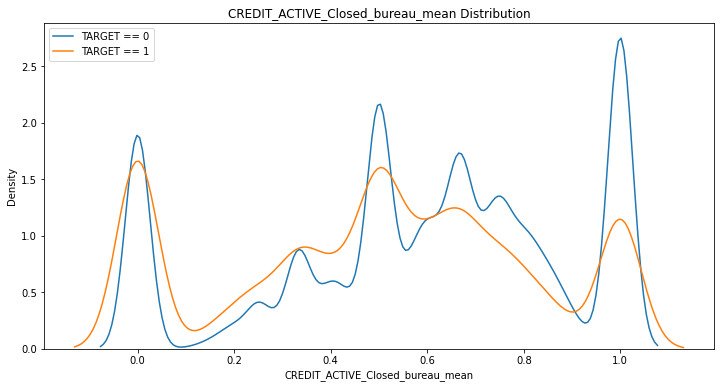

In [ ]:
kde_target('CREDIT_ACTIVE_Closed_bureau_mean', train_m2)
# CREDIT_ACTIVE :  Status of the Credit Bureau (CB) reported credits



> 1.3.3. bureau_balance 숫자형 데이터 요약항목 생성



In [ ]:
bureau_balance.head()
# 중복 SK_ID_BUREAU > SK_ID_BUREAU 로 그룹화한 후 SK_ID_CURR 로 요약항목을 생성하는 두단계 필요

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_balance_agg.columns = list(map(lambda x: '_bureau_bal_'.join(x[0:]),bureau_balance_agg.columns))
bureau_balance_agg.rename(columns = {'SK_ID_BUREAU_bureau_bal_' : 'SK_ID_BUREAU'}, inplace = True) 

In [ ]:
bureau_balance_agg.head()

,SK_ID_BUREAU,MONTHS_BALANCE_bureau_bal_count,MONTHS_BALANCE_bureau_bal_mean,MONTHS_BALANCE_bureau_bal_max,MONTHS_BALANCE_bureau_bal_min,MONTHS_BALANCE_bureau_bal_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


> 1.3.4. bureau_balance 문자형 데이터 요약항목 생성

In [ ]:
bureau_balance_categorical = pd.get_dummies(bureau_balance.select_dtypes('object'))
bureau_balance_categorical['SK_ID_BUREAU'] = bureau_balance['SK_ID_BUREAU']

In [ ]:
bureau_balance_categorical.head()

,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,SK_ID_BUREAU
0,0,0,0,0,0,0,1,0,5715448
1,0,0,0,0,0,0,1,0,5715448
2,0,0,0,0,0,0,1,0,5715448
3,0,0,0,0,0,0,1,0,5715448
4,0,0,0,0,0,0,1,0,5715448


In [ ]:
bureau_balance_categorical_grouped = bureau_balance_categorical.groupby('SK_ID_BUREAU').agg(['sum', 'mean'])
bureau_balance_categorical_grouped.columns = list(map(lambda x: '_bureau_bal_'.join(x[0:]),bureau_balance_categorical_grouped.columns))

In [ ]:
bureau_balance_categorical_grouped.head()

,STATUS_0_bureau_bal_sum,STATUS_0_bureau_bal_mean,STATUS_1_bureau_bal_sum,STATUS_1_bureau_bal_mean,STATUS_2_bureau_bal_sum,STATUS_2_bureau_bal_mean,STATUS_3_bureau_bal_sum,STATUS_3_bureau_bal_mean,STATUS_4_bureau_bal_sum,STATUS_4_bureau_bal_mean,STATUS_5_bureau_bal_sum,STATUS_5_bureau_bal_mean,STATUS_C_bureau_bal_sum,STATUS_C_bureau_bal_mean,STATUS_X_bureau_bal_sum,STATUS_X_bureau_bal_mean
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [ ]:
# SK_ID_BUREAU 기준 요약정보
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_categorical_grouped, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_BUREAU', how = 'left')
bureau_by_loan.head()

,SK_ID_BUREAU,MONTHS_BALANCE_bureau_bal_count,MONTHS_BALANCE_bureau_bal_mean,MONTHS_BALANCE_bureau_bal_max,MONTHS_BALANCE_bureau_bal_min,MONTHS_BALANCE_bureau_bal_sum,STATUS_0_bureau_bal_sum,STATUS_0_bureau_bal_mean,STATUS_1_bureau_bal_sum,STATUS_1_bureau_bal_mean,STATUS_2_bureau_bal_sum,STATUS_2_bureau_bal_mean,STATUS_3_bureau_bal_sum,STATUS_3_bureau_bal_mean,STATUS_4_bureau_bal_sum,STATUS_4_bureau_bal_mean,STATUS_5_bureau_bal_sum,STATUS_5_bureau_bal_mean,STATUS_C_bureau_bal_sum,STATUS_C_bureau_bal_mean,STATUS_X_bureau_bal_sum,STATUS_X_bureau_bal_mean,SK_ID_CURR
0,5001709,97,-48.0,0,-96,-4656,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402,NaN
1,5001710,83,-41.0,0,-82,-3403,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446,162368.0
2,5001711,4,-1.5,0,-3,-6,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000,162368.0
3,5001712,19,-9.0,0,-18,-171,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000,162368.0
4,5001713,22,-10.5,0,-21,-231,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000,150635.0


In [ ]:
# SK_ID_CURR 기준 요약정보
bureau_balance_by_client = bureau_by_loan.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean']).reset_index()
bureau_balance_by_client.columns = list(map(lambda x: '_2_'.join(x[0:]),bureau_balance_by_client.columns))
bureau_balance_by_client.rename(columns = {'SK_ID_CURR_2_' : 'SK_ID_CURR'}, inplace = True) 

In [ ]:
bureau_balance_by_client.head()

,SK_ID_CURR,MONTHS_BALANCE_bureau_bal_count_2_count,MONTHS_BALANCE_bureau_bal_count_2_mean,MONTHS_BALANCE_bureau_bal_mean_2_count,MONTHS_BALANCE_bureau_bal_mean_2_mean,MONTHS_BALANCE_bureau_bal_max_2_count,MONTHS_BALANCE_bureau_bal_max_2_mean,MONTHS_BALANCE_bureau_bal_min_2_count,MONTHS_BALANCE_bureau_bal_min_2_mean,MONTHS_BALANCE_bureau_bal_sum_2_count,MONTHS_BALANCE_bureau_bal_sum_2_mean,STATUS_0_bureau_bal_sum_2_count,STATUS_0_bureau_bal_sum_2_mean,STATUS_0_bureau_bal_mean_2_count,STATUS_0_bureau_bal_mean_2_mean,STATUS_1_bureau_bal_sum_2_count,STATUS_1_bureau_bal_sum_2_mean,STATUS_1_bureau_bal_mean_2_count,STATUS_1_bureau_bal_mean_2_mean,STATUS_2_bureau_bal_sum_2_count,STATUS_2_bureau_bal_sum_2_mean,STATUS_2_bureau_bal_mean_2_count,STATUS_2_bureau_bal_mean_2_mean,STATUS_3_bureau_bal_sum_2_count,STATUS_3_bureau_bal_sum_2_mean,STATUS_3_bureau_bal_mean_2_count,STATUS_3_bureau_bal_mean_2_mean,STATUS_4_bureau_bal_sum_2_count,STATUS_4_bureau_bal_sum_2_mean,STATUS_4_bureau_bal_mean_2_count,STATUS_4_bureau_bal_mean_2_mean,STATUS_5_bureau_bal_sum_2_count,STATUS_5_bureau_bal_sum_2_mean,STATUS_5_bureau_bal_mean_2_count,STATUS_5_bureau_bal_mean_2_mean,STATUS_C_bureau_bal_sum_2_count,STATUS_C_bureau_bal_sum_2_mean,STATUS_C_bureau_bal_mean_2_count,STATUS_C_bureau_bal_mean_2_mean,STATUS_X_bureau_bal_sum_2_count,STATUS_X_bureau_bal_sum_2_mean,STATUS_X_bureau_bal_mean_2_count,STATUS_X_bureau_bal_mean_2_mean
0,100001.0,7,24.571429,7,-11.785714,7,0.0,7,-23.571429,7,-400.000000,7,4.428571,7,0.336651,7,0.142857,7,0.007519,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,15.714286,7,0.441240,7,4.285714,7,0.214590
1,100002.0,8,13.750000,8,-21.875000,8,-15.5,8,-28.250000,8,-337.625000,8,5.625000,8,0.406960,8,3.375000,8,0.255682,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,2.875000,8,0.175426,8,1.875000,8,0.161932
2,100005.0,3,7.000000,3,-3.000000,3,0.0,3,-6.000000,3,-30.333333,3,4.666667,3,0.735043,3,0.000000,3,0.000000,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,1.666667,3,0.128205,3,0.666667,3,0.136752
3,100010.0,2,36.000000,2,-46.000000,2,-28.5,2,-63.500000,2,-1656.000000,2,10.000000,2,0.277778,2,0.000000,2,0.000000,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,26.000000,2,0.722222,2,0.000000,2,0.000000
4,100013.0,4,57.500000,4,-28.250000,4,0.0,4,-56.500000,4,-1689.000000,4,19.750000,4,0.320718,4,1.750000,4,0.027701,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,25.750000,4,0.397036,4,10.250000,4,0.254545


In [ ]:
# train_m3 : train & bureau & bureau_balance
train_m3 = train_m2.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
test_m3 = test_m2.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
print('train_m3 data 구조: ', train_m3.shape)
train_m3.head()
# Training data 구조 : (307511, 122) : dup 없음

train_m3 data 구조:  (307511, 270)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,MONTHS_BALANCE_bureau_bal_mean_2_count,MONTHS_BALANCE_bureau_bal_mean_2_mean,MONTHS_BALANCE_bureau_bal_max_2_count,MONTHS_BALANCE_bureau_bal_max_2_mean,MONTHS_BALANCE_bureau_bal_min_2_count,MONTHS_BALANCE_bureau_bal_min_2_mean,MONTHS_BALANCE_bureau_bal_sum_2_count,MONTHS_BALANCE_bureau_bal_sum_2_mean,STATUS_0_bureau_bal_sum_2_count,STATUS_0_bureau_bal_sum_2_mean,STATUS_0_bureau_bal_mean_2_count,STATUS_0_bureau_bal_mean_2_mean,STATUS_1_bureau_bal_sum_2_count,STATUS_1_bureau_bal_sum_2_mean,STATUS_1_bureau_bal_mean_2_count,STATUS_1_bureau_bal_mean_2_mean,STATUS_2_bureau_bal_sum_2_count,STATUS_2_bureau_bal_sum_2_mean,STATUS_2_bureau_bal_mean_2_count,STATUS_2_bureau_bal_mean_2_mean,STATUS_3_bureau_bal_sum_2_count,STATUS_3_bureau_bal_sum_2_mean,STATUS_3_bureau_bal_mean_2_count,STATUS_3_bureau_bal_mean_2_mean,STATUS_4_bureau_bal_sum_2_count,STATUS_4_bureau_bal_sum_2_mean,STATUS_4_bureau_bal_mean_2_count,STATUS_4_bureau_bal_mean_2_mean,STATUS_5_bureau_bal_sum_2_count,STATUS_5_bureau_bal_sum_2_mean,STATUS_5_bureau_bal_mean_2_count,STATUS_5_bureau_bal_mean_2_mean,STATUS_C_bureau_bal_sum_2_count,STATUS_C_bureau_bal_sum_2_mean,STATUS_C_bureau_bal_mean_2_count,STATUS_C_bureau_bal_mean_2_mean,STATUS_X_bureau_bal_sum_2_count,STATUS_X_bureau_bal_sum_2_mean,STATUS_X_bureau_bal_mean_2_count,STATUS_X_bureau_bal_mean_2_mean
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,8.0,-21.875,8.0,-15.5,8.0,-28.25,8.0,-337.625,8.0,5.625,8.0,0.40696,8.0,3.375,8.0,0.255682,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,2.875,8.0,0.175426,8.0,1.875,8.0,0.161932
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# 새로 생성한 데이터와 target간의 correlation 확인
new_corrs_cat = []

for col in bureau_balance_by_client.columns:
    corr = train_m3['TARGET'].corr(train_m3[col])
    new_corrs_cat.append((col, corr))

new_corrs_cat = sorted(new_corrs_cat, key = lambda x: abs(x[1]), reverse = True)
new_corrs_cat[:10]

[('MONTHS_BALANCE_bureau_bal_min_2_mean', 0.08903758347314651),
 ('MONTHS_BALANCE_bureau_bal_count_2_mean', -0.08019279487546797),
 ('MONTHS_BALANCE_bureau_bal_mean_2_mean', 0.07642449076705937),
 ('MONTHS_BALANCE_bureau_bal_sum_2_mean', 0.07260568044645976),
 ('STATUS_C_bureau_bal_sum_2_mean', -0.06295370415547595),
 ('STATUS_1_bureau_bal_mean_2_mean', 0.061182927384271356),
 ('STATUS_C_bureau_bal_mean_2_mean', -0.05593579622490026),
 ('STATUS_0_bureau_bal_mean_2_mean', 0.0441984762225916),
 ('STATUS_0_bureau_bal_sum_2_mean', -0.03586815067485118),
 ('STATUS_X_bureau_bal_sum_2_mean', -0.03329236630560262)]

Target correlation : 0.0890
Median (Target == 1) : -27.0000
Median (Target == 0) : -33.6667


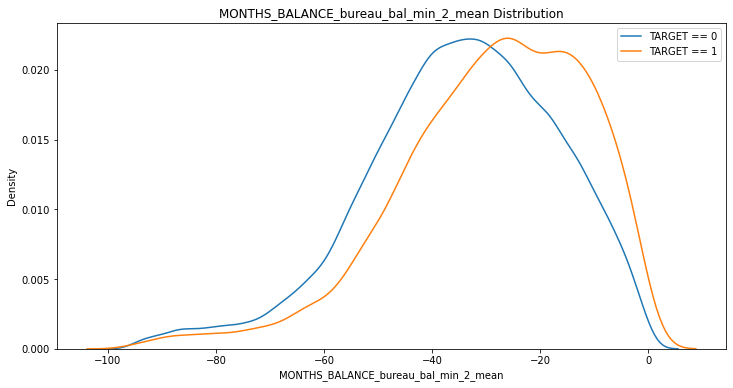

In [ ]:
kde_target('MONTHS_BALANCE_bureau_bal_min_2_mean', train_m3)
# MONTHS_BALANCE :  Month of balance relative to application date (-1 means the freshest balance date)

In [ ]:
train = train_m3
test = test_m3

In [ ]:
del train_m1, train_m2, test_m1, test_m2

> **1.4. 탐색적 데이터 분석 (EDA)**

> 1.4.1. target 분석

In [ ]:
train['TARGET'].value_counts()
# 10:1 불균형 데이터

0    282686
1     24825
Name: TARGET, dtype: int64

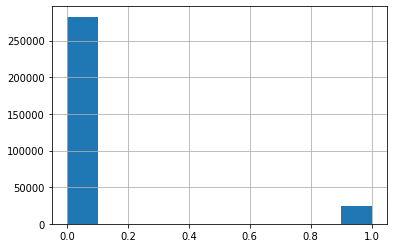

In [ ]:
train['TARGET'].hist()
# 시각화

> 1.4.2. Features 분석

1.4.2.1. 결측치 분석


In [ ]:
mis_val = train.isnull().sum()
mis_val_percent = 100 * train.isnull().sum() / len(train)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# 결측 비중으로 sort
mis_val_table_columns = mis_val_table_columns.sort_values(
'% of Total Values', ascending=True).round(1)

In [ ]:
mis_val_table_columns

,Missing Values,% of Total Values
SK_ID_CURR,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
REG_REGION_NOT_LIVE_REGION,0,0.0
REG_REGION_NOT_WORK_REGION,0,0.0
LIVE_REGION_NOT_WORK_REGION,0,0.0
...,...,...
MONTHS_BALANCE_bureau_bal_min_2_mean,215280,70.0
STATUS_X_bureau_bal_mean_2_mean,215280,70.0
AMT_ANNUITY_bureau_mean,227502,74.0
AMT_ANNUITY_bureau_max,227502,74.0


In [ ]:
# 결측 비중 50% 이하 먼저 catch 
threshold_mis_val = 50
mis_val_table_columns[mis_val_table_columns['% of Total Values'] < threshold_mis_val]

,Missing Values,% of Total Values
SK_ID_CURR,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
REG_REGION_NOT_LIVE_REGION,0,0.0
REG_REGION_NOT_WORK_REGION,0,0.0
LIVE_REGION_NOT_WORK_REGION,0,0.0
...,...,...
YEARS_BEGINEXPLUATATION_MODE,150007,48.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
FLOORSMAX_MODE,153020,49.8
FLOORSMAX_MEDI,153020,49.8


In [ ]:
features = mis_val_table_columns[mis_val_table_columns['% of Total Values'] < threshold_mis_val].index
features

Index(['SK_ID_CURR', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_7',
       ...
       'AMT_CREDIT_MAX_OVERDUE_bureau_mean',
       'AMT_CREDIT_MAX_OVERDUE_bureau_max', 'EMERGENCYSTATE_MODE',
       'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG'],
      dtype='object', length=184)

In [ ]:
# 결측치 threshold 이하 features만 남김 (임의로)
train[features].head()

,SK_ID_CURR,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_7,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_13,FLAG_DOCUMENT_12,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_8,CNT_CHILDREN,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CREDIT_CURRENCY_currency 2_bureau_sum,CREDIT_CURRENCY_currency 2_bureau_mean,CREDIT_CURRENCY_currency 3_bureau_sum,CREDIT_CURRENCY_currency 3_bureau_mean,CREDIT_CURRENCY_currency 4_bureau_sum,CREDIT_CURRENCY_currency 4_bureau_mean,CREDIT_TYPE_Another type of loan_bureau_sum,CREDIT_TYPE_Another type of loan_bureau_mean,CREDIT_TYPE_Car loan_bureau_sum,CREDIT_TYPE_Car loan_bureau_mean,CREDIT_CURRENCY_currency 1_bureau_sum,AMT_CREDIT_SUM_DEBT_bureau_sum,AMT_CREDIT_SUM_bureau_mean,AMT_CREDIT_SUM_bureau_max,AMT_CREDIT_SUM_bureau_min,DAYS_CREDIT_ENDDATE_bureau_max,DAYS_CREDIT_ENDDATE_bureau_min,DAYS_CREDIT_ENDDATE_bureau_mean,AMT_CREDIT_SUM_DEBT_bureau_max,AMT_CREDIT_SUM_DEBT_bureau_min,AMT_CREDIT_SUM_DEBT_bureau_mean,EXT_SOURCE_3,AMT_CREDIT_SUM_LIMIT_bureau_max,AMT_CREDIT_SUM_LIMIT_bureau_min,AMT_CREDIT_SUM_LIMIT_bureau_mean,DAYS_ENDDATE_FACT_bureau_min,DAYS_ENDDATE_FACT_bureau_max,DAYS_ENDDATE_FACT_bureau_mean,OCCUPATION_TYPE,AMT_CREDIT_MAX_OVERDUE_bureau_min,AMT_CREDIT_MAX_OVERDUE_bureau_mean,AMT_CREDIT_MAX_OVERDUE_bureau_max,EMERGENCYSTATE_MODE,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG
0,100002,10,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,WEDNESDAY,2,0,0,406597.5,202500.0,-3648.0,Single / not married,House / apartment,0.018801,-9461,-637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,245781.0,108131.945625,450000.0,0.0,780.0,-1072.0,-349.0,245781.0,0.0,49156.2,0.139376,31988.565,0.0,7997.14125,-1185.0,-36.0,-697.500000,Laborers,0.0,1681.029,5043.645,No,0.0149,0.9722,0.9722,0.9722,0.0833,0.0833,0.0833
1,100003,11,0,0,0,0,0,0,School,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,MONDAY,1,0,0,1293502.5,270000.0,-1186.0,Married,House / apartment,0.003541,-16765,-1188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,254350.125000,810000.0,22248.0,1216.0,-2434.0,-544.5,0.0,0.0,0.0,NaN,810000.000,0.0,202500.00000,-2131.0,-540.0,-1097.333333,Core staff,0.0,0.000,0.000,No,0.0714,0.9851,0.9851,0.9851,0.2917,0.2917,0.2917
2,100004,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MONDAY,2,0,0,135000.0,67500.0,-4260.0,Single / not married,House / apartment,0.010032,-19046,-225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,94518.900000,94537.8,94500.0,-382.0,-595.0,-488.5,0.0,0.0,0.0,0.729567,0.000,0.0,0.00000,-683.0,-382.0,-532.500000,Laborers,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,17,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,WEDNESDAY,2,0,0,312682.5,135000.0,-9833.0,Civil marriage,House / apartment,0.008019,-19005,-3039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THURSDAY,2,1,0,513000.0,121500.0,-4311.0,Single / not married,House / apartment,0.028663,-19932,-3038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,146250.000000,146250.0,146250.0,-783.0,-783.0,-783.0,0.0,0.0,0.0,NaN,0.000,0.0,0.00000,-783.0,-783.0,-783.000000,Core staff,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.4.2.2. feature 통계량 분석

In [ ]:
# EXT_SOURCE > Normalized score from external data source
print(train['EXT_SOURCE_1'].describe(), '\n')
print(round(train['EXT_SOURCE_2'],6).describe(), '\n')
print(train['EXT_SOURCE_3'].describe())

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64 

count    306851.000000
mean          0.514393
std           0.191060
min           0.000000
25%           0.392457
50%           0.565961
75%           0.663617
max           0.855000
Name: EXT_SOURCE_2, dtype: float64 

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


In [ ]:
# flag document > document 제출 여부
for i in range(20):
  print(train['FLAG_DOCUMENT_'+str(i+2)].describe())
  print(train['FLAG_DOCUMENT_'+str(i+2)].nunique(), '\n')

count    307511.000000
mean          0.000042
std           0.006502
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_2, dtype: float64
2 

count    307511.000000
mean          0.710023
std           0.453752
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_DOCUMENT_3, dtype: float64
2 

count    307511.000000
mean          0.000081
std           0.009016
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_4, dtype: float64
2 

count    307511.000000
mean          0.015115
std           0.122010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_5, dtype: float64
2 

count    307511.000000
mean          0.088055
std           0.283376
min           0.000000
25% 

In [ ]:
# AMT_REQ_CREDIT_BUREAU : CREDT_BUREAU 총 조회 수
print(train['AMT_REQ_CREDIT_BUREAU_HOUR'].describe(), '\n')
print(train['AMT_REQ_CREDIT_BUREAU_DAY'].describe(), '\n')
print(train['AMT_REQ_CREDIT_BUREAU_WEEK'].describe(), '\n')
print(train['AMT_REQ_CREDIT_BUREAU_MON'].describe(), '\n')
print(train['AMT_REQ_CREDIT_BUREAU_QRT'].describe(), '\n') # qrt max (261) 값이 year max (25) 보다 많음. 이상치.
print(train['AMT_REQ_CREDIT_BUREAU_YEAR'].describe(), '\n')

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64 

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64 

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64 

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64 

count    265992.000000
mean          0.265474
std           0.

In [ ]:
# 이상치 확인
train['AMT_REQ_CREDIT_BUREAU_QRT'][train['AMT_REQ_CREDIT_BUREAU_QRT'] > 50]

239474    261.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
# 'NAME_TYPE_SUITE', 동행인 > (비동반; 가족; 배우자; 아이; others; 사람들) > 그룹화 고민  
print(train['NAME_TYPE_SUITE'].describe(), '\n')
print(train['NAME_TYPE_SUITE'].unique())

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object 

['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']


In [ ]:
# OBS, DEF
# OBS_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 30 DPD (days past due) default
# DEF_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
# 채무불이행

print(train['OBS_30_CNT_SOCIAL_CIRCLE'].describe(), '\n')
print(train['OBS_60_CNT_SOCIAL_CIRCLE'].describe(), '\n')
print(train['DEF_30_CNT_SOCIAL_CIRCLE'].describe(), '\n')
print(train['DEF_60_CNT_SOCIAL_CIRCLE'].describe(), '\n')

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64 

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64 

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64 

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64 



In [ ]:
# 각종 amt, cnt
print(round(train['AMT_GOODS_PRICE']/1000).describe(), '\n') # 대출금액(천) ; 538
print(round(train['AMT_CREDIT']/1000).describe(), '\n') # 대출신용금액(천) ; 599
print(round(train['AMT_ANNUITY']/1000).describe(), '\n') # 연대출상환금액(천) ; 27
print(round(train['AMT_INCOME_TOTAL']/1000).describe(), '\n') #고객소득(천)
print(train['CNT_FAM_MEMBERS'].describe(), '\n') # 가족수
print(train['CNT_CHILDREN'].describe(), '\n') # 자녀수

count    307233.000000
mean        538.391501
std         369.449803
min          40.000000
25%         238.000000
50%         450.000000
75%         680.000000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64 

count    307511.000000
mean        599.023563
std         402.475007
min          45.000000
25%         270.000000
50%         514.000000
75%         809.000000
max        4050.000000
Name: AMT_CREDIT, dtype: float64 

count    307499.000000
mean         27.120469
std          14.496084
min           2.000000
25%          17.000000
50%          25.000000
75%          35.000000
max         258.000000
Name: AMT_ANNUITY, dtype: float64 

count    307511.000000
mean        168.788606
std         237.123523
min          26.000000
25%         112.000000
50%         147.000000
75%         202.000000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64 

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.0000

In [ ]:
# flag
for c in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE','FLAG_EMP_PHONE', 'FLAG_MOBIL',]:
  print(train[c].describe())
  print(train[c].nunique(), train[c].unique(), '\n')

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object
3 ['M' 'F' 'XNA'] 

count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object
2 ['N' 'Y'] 

count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY, dtype: object
2 ['Y' 'N'] 

count    307511.000000
mean          0.281066
std           0.449521
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLAG_PHONE, dtype: float64
2 [1 0] 

count    307511.000000
mean          0.056720
std           0.231307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_EMAIL, dtype: float64
2 [0 1] 

count    307511.000000
mean          0.998133
std           0.043164
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: 

In [ ]:
# flag 2
# 일하는 곳과 주소가 일치하는지 여부 (지역단위, 도시단위)
for c in [ 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 
      'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
      'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION']:
  print(train[c].describe())
  print(train[c].nunique(), train[c].unique(), '\n')

count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64
2 [0 1] 

count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
2 [0 1] 

count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
2 [0 1] 

count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
2 [0 1] 

count    307511.000000
mean          0

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


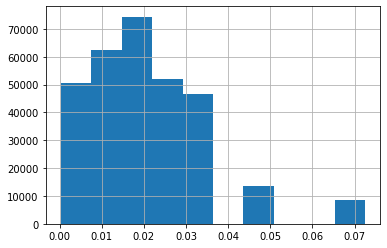

In [ ]:
print(train['REGION_POPULATION_RELATIVE'].describe()) #거주지 인구수 (Normalized)
train['REGION_POPULATION_RELATIVE'].hist()

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64
24 [10 11  9 17 16 14  8 15  7 13  6 12 19  3 18 21  4  5 20 22  1  2 23  0] 

count      307511
unique          7
top       TUESDAY
freq        53901
Name: WEEKDAY_APPR_PROCESS_START, dtype: object
7 ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY'] 

count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
3 [2 1 3] 

count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64
3 [2 1 3] 



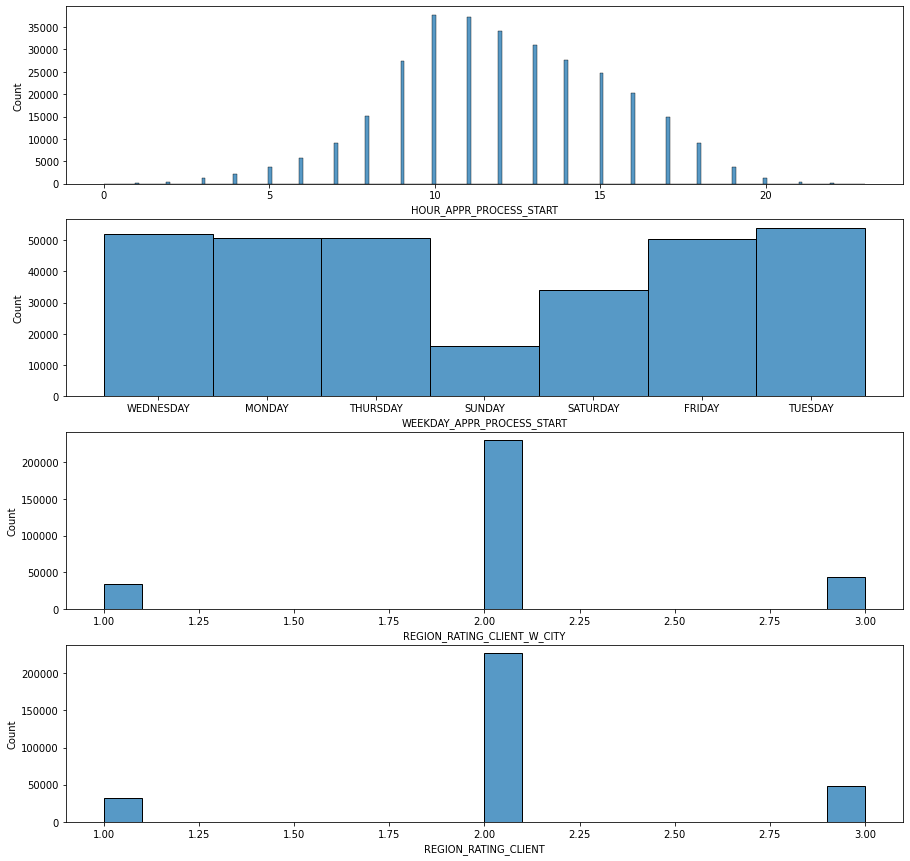

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(15,15))
for i, c in enumerate(['HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START', # 대출 신청 시간 및 요일
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT']): # 거주지 지역 평가 (1,2,3)
  print(train[c].describe())
  print(train[c].nunique(), train[c].unique(), '\n')
  sns.histplot(data=train[c], x=train[c], ax=axes[i])

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64
6168 [-2120  -291 -2531 ... -6194 -5854 -6211] 

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64
15688 [ -3648.  -1186.  -4260. ... -16396. -14558. -14798.] 

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
12574 [  -637  -1188   -225 ... -12971 -11084  -8694] 

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max   

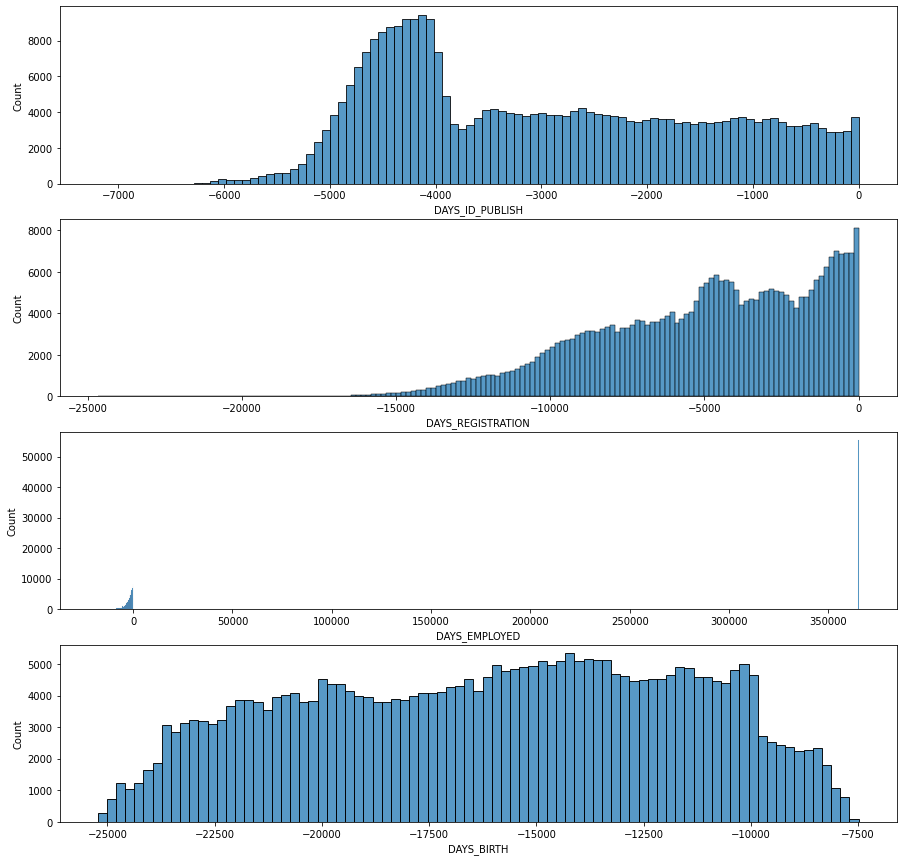

In [ ]:
# Days 분석
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(15,15))
for i, c in enumerate(['DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH']): 
  print(train[c].describe())
  print(train[c].nunique(), train[c].unique(), '\n')
  sns.histplot(data=train[c], x=train[c], ax=axes[i])

# DAYS_EMPLOYED 이상치 발견 (365243). 조정 필요.

In [ ]:
for c in ['ORGANIZATION_TYPE', # 일하는 조직 유형 : 58
          'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']: #주거, 가족, 교육, 소득
  print(train[c].describe())
  print(train[c].nunique(), train[c].unique(), '\n')

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object
58 ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: 

> 1.4.2.3. 이상치 조정

EDA를 통해 확인한 이상치가 있던 feature 조정

In [ ]:
# train_1 : raw table인 train 에서 결측 비중 threshold 미만 columns 만 추출
train_1 = train[features]
print('train_1 data 구조: ', train_1.shape)
train_1.head()

train_1 data 구조:  (307511, 184)


,SK_ID_CURR,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_7,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_13,FLAG_DOCUMENT_12,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_8,CNT_CHILDREN,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CREDIT_CURRENCY_currency 2_bureau_sum,CREDIT_CURRENCY_currency 2_bureau_mean,CREDIT_CURRENCY_currency 3_bureau_sum,CREDIT_CURRENCY_currency 3_bureau_mean,CREDIT_CURRENCY_currency 4_bureau_sum,CREDIT_CURRENCY_currency 4_bureau_mean,CREDIT_TYPE_Another type of loan_bureau_sum,CREDIT_TYPE_Another type of loan_bureau_mean,CREDIT_TYPE_Car loan_bureau_sum,CREDIT_TYPE_Car loan_bureau_mean,CREDIT_CURRENCY_currency 1_bureau_sum,AMT_CREDIT_SUM_DEBT_bureau_sum,AMT_CREDIT_SUM_bureau_mean,AMT_CREDIT_SUM_bureau_max,AMT_CREDIT_SUM_bureau_min,DAYS_CREDIT_ENDDATE_bureau_max,DAYS_CREDIT_ENDDATE_bureau_min,DAYS_CREDIT_ENDDATE_bureau_mean,AMT_CREDIT_SUM_DEBT_bureau_max,AMT_CREDIT_SUM_DEBT_bureau_min,AMT_CREDIT_SUM_DEBT_bureau_mean,EXT_SOURCE_3,AMT_CREDIT_SUM_LIMIT_bureau_max,AMT_CREDIT_SUM_LIMIT_bureau_min,AMT_CREDIT_SUM_LIMIT_bureau_mean,DAYS_ENDDATE_FACT_bureau_min,DAYS_ENDDATE_FACT_bureau_max,DAYS_ENDDATE_FACT_bureau_mean,OCCUPATION_TYPE,AMT_CREDIT_MAX_OVERDUE_bureau_min,AMT_CREDIT_MAX_OVERDUE_bureau_mean,AMT_CREDIT_MAX_OVERDUE_bureau_max,EMERGENCYSTATE_MODE,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG
0,100002,10,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,WEDNESDAY,2,0,0,406597.5,202500.0,-3648.0,Single / not married,House / apartment,0.018801,-9461,-637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,245781.0,108131.945625,450000.0,0.0,780.0,-1072.0,-349.0,245781.0,0.0,49156.2,0.139376,31988.565,0.0,7997.14125,-1185.0,-36.0,-697.500000,Laborers,0.0,1681.029,5043.645,No,0.0149,0.9722,0.9722,0.9722,0.0833,0.0833,0.0833
1,100003,11,0,0,0,0,0,0,School,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,MONDAY,1,0,0,1293502.5,270000.0,-1186.0,Married,House / apartment,0.003541,-16765,-1188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,254350.125000,810000.0,22248.0,1216.0,-2434.0,-544.5,0.0,0.0,0.0,NaN,810000.000,0.0,202500.00000,-2131.0,-540.0,-1097.333333,Core staff,0.0,0.000,0.000,No,0.0714,0.9851,0.9851,0.9851,0.2917,0.2917,0.2917
2,100004,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MONDAY,2,0,0,135000.0,67500.0,-4260.0,Single / not married,House / apartment,0.010032,-19046,-225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,94518.900000,94537.8,94500.0,-382.0,-595.0,-488.5,0.0,0.0,0.0,0.729567,0.000,0.0,0.00000,-683.0,-382.0,-532.500000,Laborers,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,17,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,WEDNESDAY,2,0,0,312682.5,135000.0,-9833.0,Civil marriage,House / apartment,0.008019,-19005,-3039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THURSDAY,2,1,0,513000.0,121500.0,-4311.0,Single / not married,House / apartment,0.028663,-19932,-3038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,146250.000000,146250.0,146250.0,-783.0,-783.0,-783.0,0.0,0.0,0.0,NaN,0.000,0.0,0.00000,-783.0,-783.0,-783.000000,Core staff,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_1 = test[features.drop('TARGET')]
test_1.head()

In [ ]:
# AMT_REQ_CREDIT_BUREAU_QRT
print(train['AMT_REQ_CREDIT_BUREAU_QRT'].describe(), '\n') # qrt(분기) max 값이 year(년) max 보다 많음. 이상치 주의.
print(train['AMT_REQ_CREDIT_BUREAU_YEAR'].describe(), '\n')

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64 

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64 



In [ ]:
# 이상치 확인 1 : AMT_REQ_CREDIT_BUREAU_QRT
train_1['AMT_REQ_CREDIT_BUREAU_QRT'][train_1['AMT_REQ_CREDIT_BUREAU_QRT'] > 50]

239474    261.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
train_1['AMT_REQ_CREDIT_BUREAU_QRT'].replace({261: 0}, inplace = True)

In [ ]:
train_1['AMT_REQ_CREDIT_BUREAU_QRT'][train_1['AMT_REQ_CREDIT_BUREAU_QRT'] > 50]

Series([], Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64)

In [ ]:
# 이상치 확인 2 :'DAYS_EMPLOYED'
train_1['DAYS_EMPLOYED'].describe() 

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

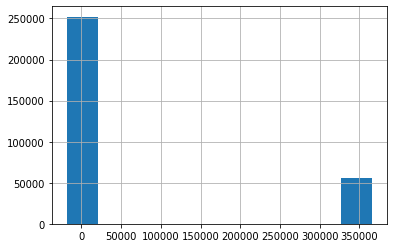

In [ ]:
train_1['DAYS_EMPLOYED'].hist() 
# 350000 부근에 값이 몰려있음 (이상치 발견)

In [ ]:
train_1['DAYS_EMPLOYED'][train_1['DAYS_EMPLOYED'] > 340000].unique()

array([365243])

In [ ]:
train_1['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

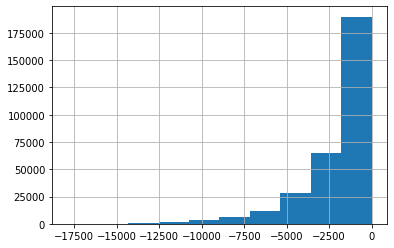

In [ ]:
train_1['DAYS_EMPLOYED'].hist()

> 1.5. 결합데이터 feature engineering

범주화 : 문자형 데이터 dummy 변수 생성

In [ ]:
train_1.dtypes.value_counts()

float64    130
int64       41
object      13
dtype: int64

In [ ]:
# 문자형 데이터 unique 값 
train_1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

ORGANIZATION_TYPE             58
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
FLAG_OWN_REALTY                2
NAME_EDUCATION_TYPE            5
FLAG_OWN_CAR                   2
CODE_GENDER                    3
NAME_CONTRACT_TYPE             2
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
OCCUPATION_TYPE               18
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
train_1.drop('ORGANIZATION_TYPE', axis=1, inplace=True)
test_1.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

In [ ]:
train_1.select_dtypes('object').head()

,WEEKDAY_APPR_PROCESS_START,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,FLAG_OWN_CAR,CODE_GENDER,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,EMERGENCYSTATE_MODE
0,WEDNESDAY,Single / not married,House / apartment,Y,Secondary / secondary special,N,M,Cash loans,Working,Unaccompanied,Laborers,No
1,MONDAY,Married,House / apartment,N,Higher education,N,F,Cash loans,State servant,Family,Core staff,No
2,MONDAY,Single / not married,House / apartment,Y,Secondary / secondary special,Y,M,Revolving loans,Working,Unaccompanied,Laborers,NaN
3,WEDNESDAY,Civil marriage,House / apartment,Y,Secondary / secondary special,N,F,Cash loans,Working,Unaccompanied,Laborers,NaN
4,THURSDAY,Single / not married,House / apartment,Y,Secondary / secondary special,N,M,Cash loans,Working,Unaccompanied,Core staff,NaN


In [ ]:
# one-hot 인코딩
train_1 = pd.get_dummies(train_1)
test_1 = pd.get_dummies(test_1)

print('Training Features shape: ', train_1.shape)
print('Testing Features shape: ', test_1.shape)

Training Features shape:  (307511, 239)
Testing Features shape:  (48744, 235)


In [ ]:
# 범주형 데이터 train과 test 컬럼수 맞추기
train_labels = train_1['TARGET']
train_1, test_1 = train_1.align(test_1, join = 'inner', axis = 1)
train_1['TARGET'] = train_labels

print('Training Features shape: ', train_1.shape)
print('Testing Features shape: ', test_1.shape)

Training Features shape:  (307511, 236)
Testing Features shape:  (48744, 235)


> **1.6. 결합데이터 Target Correlation**

In [ ]:
correlations = train_1.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_ENDDATE_FACT_bureau_mean       0.053200
DAYS_CREDIT_ENDDATE_bureau_sum      0.053735
CODE_GENDER_M                       0.054713
DAYS_LAST_PHONE_CHANGE              0.055218
DAYS_ENDDATE_FACT_bureau_min        0.055887
NAME_INCOME_TYPE_Working            0.057481
REGION_RATING_CLIENT                0.058899
REGION_RATING_CLIENT_W_CITY         0.060893
CREDIT_ACTIVE_Active_bureau_sum     0.067128
DAYS_CREDIT_UPDATE_bureau_mean      0.068927
DAYS_CREDIT_bureau_min              0.075248
CREDIT_ACTIVE_Active_bureau_mean    0.077356
DAYS_BIRTH                          0.078239
DAYS_CREDIT_bureau_mean             0.089729
TARGET                              1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
CREDIT_ACTIVE_Closed_bureau_mean       -0.079369
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0

Target correlation : -0.1789
Median (Target == 1) : 0.3791
Median (Target == 0) : 0.5460


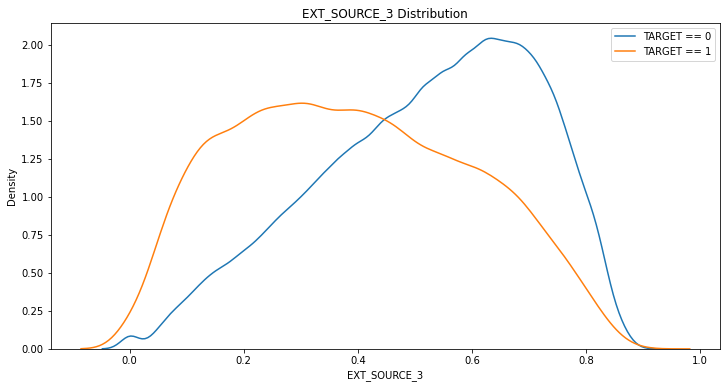

In [ ]:
kde_target('EXT_SOURCE_3', train_1)

Target correlation : 0.0782
Median (Target == 1) : -14282.0000
Median (Target == 0) : -15877.0000


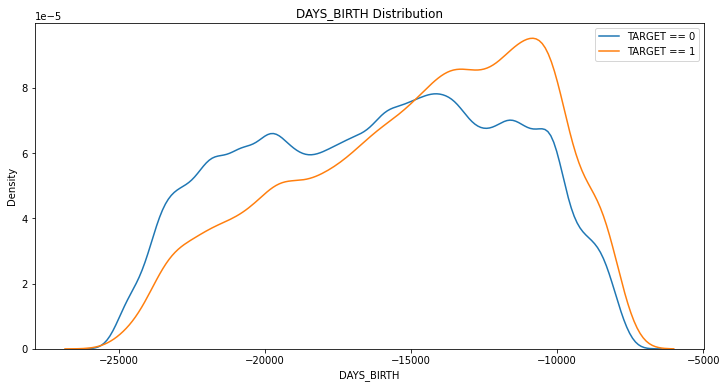

In [ ]:
kde_target('DAYS_BIRTH', train_1)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(20.0, 30.0]"
1,0,-16765,45.931507,"(40.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 60.0]"
3,0,-19005,52.068493,"(50.0, 60.0]"
4,0,-19932,54.608219,"(50.0, 60.0]"


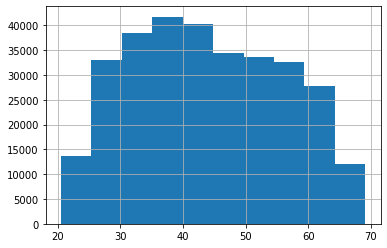

In [ ]:
# day > year 변환 가능
import numpy as np
age_data = train_1[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 6))
age_data['YEARS_BIRTH'].hist()
age_data.head(5)

In [ ]:
# Exterior Sources 간의 상관관계

# Extract the EXT_SOURCE variables and show correlations
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


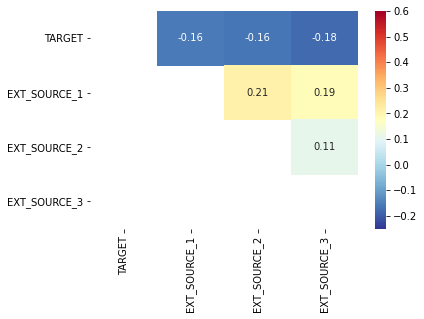

In [ ]:
# upper heatmap : ext_source 끼리 상관관계 높지 않음
sns.heatmap(ext_data_corrs.where(np.triu(np.ones(ext_data_corrs.shape), k=1).astype(np.bool)), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)



> **1.7. Feature Selection**





> 1.7.1. Correlation을 이용한 Selection



In [ ]:
# 상관성 임계치
threshold_corr = 0.7

corr_matrix = train_1.drop(columns=['TARGET']).corr().abs()
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper_corr_matrix.head()

,SK_ID_CURR,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_7,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_13,FLAG_DOCUMENT_12,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_8,CNT_CHILDREN,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,CODE_GENDER_F,CODE_GENDER_M,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,NaN,0.00035,0.000283,0.001097,0.002903,0.001885,0.001582,0.000067,0.002694,0.000282,0.001073,0.000167,0.000509,0.001450,0.000724,0.002604,0.001077,0.000896,0.001045,0.002012,0.000815,0.001505,0.000700,0.003411,0.004139,0.001097,0.002121,0.001138,0.001809,0.001129,0.000343,0.001820,0.000973,0.000849,0.001500,0.001366,0.000384,0.002804,0.001337,0.000415,...,0.001216,0.001216,0.000749,0.000728,0.001654,0.001654,0.000154,0.000685,0.001399,0.001950,0.001551,0.001953,0.002610,0.001234,0.000849,0.000292,0.000356,0.002849,0.000131,0.000074,0.001737,0.002062,0.001272,0.000608,0.000467,0.000142,0.001874,0.000920,0.001044,0.000690,0.001002,0.002756,0.000451,0.001364,0.003176,0.000653,0.001850,0.001000,0.000510,0.002549
HOUR_APPR_PROCESS_START,NaN,NaN,0.054894,0.075037,0.060920,0.016976,0.021504,0.015507,0.002103,0.003998,0.003277,0.002507,0.021584,0.005233,0.019066,0.009465,0.021618,0.023929,0.003465,0.014224,0.002597,0.016209,0.001964,0.013992,0.000156,0.026158,0.069582,0.264815,0.033338,0.007292,0.052738,0.036459,0.010908,0.171285,0.091064,0.091138,0.031676,0.000517,0.091356,0.036826,...,0.014369,0.014369,0.007162,0.007145,0.035897,0.035897,0.003905,0.087778,0.091451,0.008800,0.000669,0.000895,0.000508,0.001595,0.027813,0.001940,0.009190,0.004683,0.000586,0.026467,0.033315,0.014161,0.002163,0.026282,0.000158,0.010885,0.022952,0.009775,0.017425,0.002685,0.026672,0.003045,0.008667,0.002590,0.003305,0.010634,0.028134,0.005434,0.076854,0.020088
REG_REGION_NOT_LIVE_REGION,NaN,NaN,NaN,0.450804,0.088263,0.339232,0.143075,0.009838,0.002127,0.005006,0.002794,0.001934,0.008344,0.004498,0.006509,0.002017,0.002128,0.003407,0.000316,0.103987,0.004989,0.017464,0.000806,0.033659,0.001118,0.009517,0.024062,0.041143,0.023669,0.013319,0.024010,0.031191,0.028213,0.002118,0.065486,0.035803,0.034757,0.000224,0.036640,0.064484,...,0.000668,0.000668,0.023688,0.023692,0.018561,0.018561,0.013301,0.065544,0.036759,0.007868,0.006012,0.005248,0.023471,0.006617,0.016915,0.000991,0.003962,0.002747,0.008070,0.020511,0.002516,0.007300,0.001538,0.013279,0.005727,0.004655,0.009261,0.005821,0.006505,0.000873,0.011346,0.008636,0.009168,0.002496,0.010436,0.000313,0.006517,0.

In [ ]:
features_drop_corr = [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > threshold_corr)]

print('제거된 feature 수 :' , (len(features_drop_corr)))

제거된 feature 수 : 78


In [ ]:
features_drop_corr

['LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT',
 'CNT_FAM_MEMBERS',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT_SUM_bureau_count',
 'CNT_CREDIT_PROLONG_bureau_max',
 'CNT_CREDIT_PROLONG_bureau_mean',
 'CNT_CREDIT_PROLONG_bureau_count',
 'AMT_CREDIT_SUM_LIMIT_bureau_count',
 'AMT_CREDIT_SUM_OVERDUE_bureau_count',
 'DAYS_ENDDATE_FACT_bureau_sum',
 'DAYS_CREDIT_bureau_count',
 'AMT_CREDIT_SUM_OVERDUE_bureau_max',
 'DAYS_ENDDATE_FACT_bureau_count',
 'AMT_CREDIT_SUM_OVERDUE_bureau_sum',
 'DAYS_CREDIT_UPDATE_bureau_count',
 'DAYS_CREDIT_UPDATE_bureau_mean',
 'DAYS_CREDIT_ENDDATE_bureau_count',
 'CREDIT_DAY_OVERDUE_bureau_max',
 'CREDIT_DAY_OVERDUE_bureau_mean',
 'DAYS_CREDIT_bureau_sum',
 'DAYS_CREDIT_bureau_min',
 'AMT_CREDIT_SUM_OVERDUE_bureau_min',
 'AMT_CREDIT_MAX_OVERDUE_bureau_count',
 'DAYS_CREDIT_UPDATE_bureau_min',
 'CREDIT_TYPE_Interbank credit_bureau_mean',
 'CRED

> 1.7.2. Feature Importance를 이용한 Selection

In [ ]:
import lightgbm as lgb

# feature_importances 용 모델 gradientboosted model 사용. 
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [ ]:
from sklearn.model_selection import train_test_split

X = train_1[train_1.columns.drop(['TARGET','SK_ID_CURR'])]
y = train_1['TARGET'].values.reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y)

model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_val, y_val)], 
              eval_metric = 'auc', verbose = 200)

feature_importances = model.feature_importances_

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's binary_logloss: 0.530006	valid_0's auc: 0.758767
Early stopping, best iteration is:
[130]	valid_0's binary_logloss: 0.547483	valid_0's auc: 0.76003


In [ ]:
feature_importances = pd.DataFrame({'feature': list(train_1.columns.drop(['TARGET','SK_ID_CURR'])), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head()

,feature,importance
152,EXT_SOURCE_3,220
47,EXT_SOURCE_2,200
33,DAYS_BIRTH,147
45,AMT_ANNUITY,141
29,AMT_CREDIT,127


In [ ]:
feature_importances.tail()

,feature,importance
95,CREDIT_TYPE_Interbank credit_bureau_mean,0
98,CREDIT_TYPE_Loan for purchase of shares (margi...,0
174,WEEKDAY_APPR_PROCESS_START_TUESDAY,0
99,CREDIT_TYPE_Loan for purchase of shares (margi...,0
117,CREDIT_TYPE_Cash loan (non-earmarked)_bureau_sum,0


In [ ]:
# feature_importances 가 0인 경우
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 76 features with 0.0 importance


,feature,importance
95,CREDIT_TYPE_Interbank credit_bureau_mean,0
98,CREDIT_TYPE_Loan for purchase of shares (margi...,0
174,WEEKDAY_APPR_PROCESS_START_TUESDAY,0
99,CREDIT_TYPE_Loan for purchase of shares (margi...,0
117,CREDIT_TYPE_Cash loan (non-earmarked)_bureau_sum,0


In [ ]:
feature_importances['importance_normalized'] = feature_importances['importance'] / feature_importances['importance'].sum()
feature_importances['cumulative_importance'] = np.cumsum(feature_importances['importance_normalized'])

In [ ]:
feature_importances.head()

,feature,importance,importance_normalized,cumulative_importance
152,EXT_SOURCE_3,220,0.056410,0.056410
47,EXT_SOURCE_2,200,0.051282,0.107692
33,DAYS_BIRTH,147,0.037692,0.145385
45,AMT_ANNUITY,141,0.036154,0.181538
29,AMT_CREDIT,127,0.032564,0.214103


In [ ]:
# 누적 중요도가 threshold 미만인 Feature 만 select
threshold_select = 0.95

features_to_keep = list(feature_importances[feature_importances['cumulative_importance'] < threshold_select]['feature']) 
train_small = train_1[features_to_keep + ['TARGET','SK_ID_CURR']]
test_small = test_1[features_to_keep + ['SK_ID_CURR']]

In [ ]:
train_small.head()

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_CREDIT_ENDDATE_bureau_max,DAYS_CREDIT_bureau_max,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_ENDDATE_FACT_bureau_max,AMT_CREDIT_SUM_bureau_min,DAYS_LAST_PHONE_CHANGE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE,AMT_CREDIT_SUM_DEBT_bureau_mean,AMT_CREDIT_MAX_OVERDUE_bureau_mean,DAYS_CREDIT_ENDDATE_bureau_mean,AMT_INCOME_TOTAL,AMT_CREDIT_SUM_bureau_mean,DAYS_CREDIT_bureau_mean,AMT_CREDIT_SUM_bureau_max,DAYS_ENDDATE_FACT_bureau_mean,DAYS_CREDIT_bureau_min,DAYS_CREDIT_UPDATE_bureau_max,DAYS_ENDDATE_FACT_bureau_min,DAYS_CREDIT_ENDDATE_bureau_sum,CODE_GENDER_F,AMT_CREDIT_SUM_bureau_sum,DAYS_CREDIT_UPDATE_bureau_sum,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_UPDATE_bureau_min,NAME_EDUCATION_TYPE_Higher education,AMT_CREDIT_SUM_LIMIT_bureau_mean,HOUR_APPR_PROCESS_START,AMT_CREDIT_SUM_DEBT_bureau_max,DAYS_CREDIT_ENDDATE_bureau_min,AMT_CREDIT_MAX_OVERDUE_bureau_max,YEARS_BEGINEXPLUATATION_MEDI,...,CREDIT_TYPE_Credit card_bureau_mean,DEF_30_CNT_SOCIAL_CIRCLE,CREDIT_TYPE_Consumer credit_bureau_mean,AMT_ANNUITY_bureau_sum,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_SUM_DEBT_bureau_min,AMT_CREDIT_SUM_LIMIT_bureau_max,AMT_REQ_CREDIT_BUREAU_QRT,NAME_EDUCATION_TYPE_Secondary / secondary special,CREDIT_TYPE_Microloan_bureau_mean,CREDIT_TYPE_Mortgage_bureau_mean,FLOORSMAX_AVG,AMT_CREDIT_SUM_DEBT_bureau_count,FLAG_DOCUMENT_3,YEARS_BEGINEXPLUATATION_AVG,AMT_CREDIT_SUM_LIMIT_bureau_sum,OCCUPATION_TYPE_Core staff,CREDIT_ACTIVE_Active_bureau_mean,CREDIT_ACTIVE_Closed_bureau_mean,AMT_ANNUITY_bureau_count,AMT_REQ_CREDIT_BUREAU_MON,DEF_60_CNT_SOCIAL_CIRCLE,NAME_INCOME_TYPE_Working,CODE_GENDER_M,FLAG_WORK_PHONE,FLAG_DOCUMENT_16,CREDIT_TYPE_Consumer credit_bureau_sum,OBS_60_CNT_SOCIAL_CIRCLE,CREDIT_ACTIVE_Closed_bureau_sum,AMT_CREDIT_MAX_OVERDUE_bureau_min,FLAG_DOCUMENT_18,CREDIT_TYPE_Credit card_bureau_sum,AMT_CREDIT_SUM_OVERDUE_bureau_max,REG_CITY_NOT_LIVE_CITY,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,DAYS_CREDIT_ENDDATE_bureau_count,DAYS_ENDDATE_FACT_bureau_count,TARGET,SK_ID_CURR
0,0.139376,0.262949,-9461,24700.5,406597.5,351000.0,-637,780.0,-103.0,-2120,-3648.0,-36.0,0.0,-1134.0,0.018801,0.0149,49156.2,1681.029,-349.0,202500.0,108131.945625,-874.00,450000.0,-697.500000,-1437.0,-7.0,-1185.0,-2094.0,0,865055.565,-3999.0,1.0,-1185.0,0,7997.14125,10,245781.0,-1072.0,5043.645,0.9722,...,0.5,2.0,0.5,0.0,2,0.0,31988.565,0.0,1,0.0,0.0,0.0833,5.0,1,0.9722,31988.565,0,0.25,0.75,7.0,0.0,2.0,1,1,0,0,4.0,2.0,6.0,0.0,0,4.0,0.0,0,0,1,6.0,6.0,1,100002
1,NaN,0.622246,-16765,35698.5,1293502.5,1129500.0,-1188,1216.0,-606.0,-291,-1186.0,-540.0,22248.0,-828.0,0.003541,0.0714,0.0,0.000,-544.5,270000.0,254350.125000,-1400.75,810000.0,-1097.333333,-2586.0,-43.0,-2131.0,-2178.0,1,1017400.500,-3264.0,0.0,-2131.0,1,202500.00000,11,0.0,-2434.0,0.000,0.9851,...,0.5,0.0,0.5,0.0,1,0.0,810000.000,0.0,0,0.0,0.0,0.2917,4.0,1,0.9851,810000.000,1,0.25,0.75,0.0,0.0,0.0,0,0,0,0,2.0,1.0,3.0,0.0,0,2.0,0.0,0,0,0,4.0,3.0,0,100003
2,0.729567,0.555912,-19046,6750.0,135000.0,135000.0,-225,-382.0,-408.0,-2531,-4260.0,-382.0,94500.0,-815.0,0.010032,NaN,0.0,0.000,-488.5,67500.0,94518.900000,-867.00,94537.8,-532.500000,-1326.0,-382.0,-683.0,-977.0,0,189037.800,-1064.0,0.0,-682.0,0,0.00000,9,0.0,-595.0,0.000,NaN,...,0.0,0.0,1.0,0.0,2,0.0,0.000,0.0,1,0.0,0.0,NaN,2.0,0,NaN,0.000,0,0.00,1.00,0.0,0.0,0.0,1,1,1,0,2.0,0.0,2.0,0.0,0,0.0,0.0,0,0,1,2.0,2.0,0,100004
3,NaN,0.650442,-19005,29686.5,312682.5,297000.0,-3039,NaN,NaN,-2437,-9833.0,NaN,NaN,-617.0,0.008019,NaN,NaN,NaN,NaN,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,NaN,17,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,1,0,0,0,NaN,2.0,NaN,NaN,0,NaN,NaN,0,0,1,NaN,NaN,0,100006
4,NaN,0.322738,-19932,21865.5,513000.0,513000.0,-3038,-783.0,-1149.0,-3458,-4311.0,-783.0,146250.0,-1106.0,0.028663,NaN,0.0,0.000,-783.0,121500.0,146250.000000,-1149.00,146250.0,-783.000000,-1149.0,-783.0,-783.0,-783.0,0,146250

In [ ]:
test_small.head()

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_CREDIT_ENDDATE_bureau_max,DAYS_CREDIT_bureau_max,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_ENDDATE_FACT_bureau_max,AMT_CREDIT_SUM_bureau_min,DAYS_LAST_PHONE_CHANGE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE,AMT_CREDIT_SUM_DEBT_bureau_mean,AMT_CREDIT_MAX_OVERDUE_bureau_mean,DAYS_CREDIT_ENDDATE_bureau_mean,AMT_INCOME_TOTAL,AMT_CREDIT_SUM_bureau_mean,DAYS_CREDIT_bureau_mean,AMT_CREDIT_SUM_bureau_max,DAYS_ENDDATE_FACT_bureau_mean,DAYS_CREDIT_bureau_min,DAYS_CREDIT_UPDATE_bureau_max,DAYS_ENDDATE_FACT_bureau_min,DAYS_CREDIT_ENDDATE_bureau_sum,CODE_GENDER_F,AMT_CREDIT_SUM_bureau_sum,DAYS_CREDIT_UPDATE_bureau_sum,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_UPDATE_bureau_min,NAME_EDUCATION_TYPE_Higher education,AMT_CREDIT_SUM_LIMIT_bureau_mean,HOUR_APPR_PROCESS_START,AMT_CREDIT_SUM_DEBT_bureau_max,DAYS_CREDIT_ENDDATE_bureau_min,AMT_CREDIT_MAX_OVERDUE_bureau_max,YEARS_BEGINEXPLUATATION_MEDI,...,NAME_FAMILY_STATUS_Married,CREDIT_TYPE_Credit card_bureau_mean,DEF_30_CNT_SOCIAL_CIRCLE,CREDIT_TYPE_Consumer credit_bureau_mean,AMT_ANNUITY_bureau_sum,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_SUM_DEBT_bureau_min,AMT_CREDIT_SUM_LIMIT_bureau_max,AMT_REQ_CREDIT_BUREAU_QRT,NAME_EDUCATION_TYPE_Secondary / secondary special,CREDIT_TYPE_Microloan_bureau_mean,CREDIT_TYPE_Mortgage_bureau_mean,FLOORSMAX_AVG,AMT_CREDIT_SUM_DEBT_bureau_count,FLAG_DOCUMENT_3,YEARS_BEGINEXPLUATATION_AVG,AMT_CREDIT_SUM_LIMIT_bureau_sum,OCCUPATION_TYPE_Core staff,CREDIT_ACTIVE_Active_bureau_mean,CREDIT_ACTIVE_Closed_bureau_mean,AMT_ANNUITY_bureau_count,AMT_REQ_CREDIT_BUREAU_MON,DEF_60_CNT_SOCIAL_CIRCLE,NAME_INCOME_TYPE_Working,CODE_GENDER_M,FLAG_WORK_PHONE,FLAG_DOCUMENT_16,CREDIT_TYPE_Consumer credit_bureau_sum,OBS_60_CNT_SOCIAL_CIRCLE,CREDIT_ACTIVE_Closed_bureau_sum,AMT_CREDIT_MAX_OVERDUE_bureau_min,FLAG_DOCUMENT_18,CREDIT_TYPE_Credit card_bureau_sum,AMT_CREDIT_SUM_OVERDUE_bureau_max,REG_CITY_NOT_LIVE_CITY,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,DAYS_CREDIT_ENDDATE_bureau_count,DAYS_ENDDATE_FACT_bureau_count,SK_ID_CURR
0,0.159520,0.789654,-19241,20560.5,568800.0,450000.0,-2329,1778.0,-49.0,-812,-5170.0,-544.0,85500.00,-1740.0,0.018850,0.0392,85240.928571,NaN,82.428571,135000.0,207623.571429,-735.000000,378000.0,-825.500000,-1572.0,-6.0,-1328.0,577.0,1,1453365.00,-652.0,0.0,-155.0,1,0.000000,18,373239.0,-1329.0,NaN,0.9732,...,1,0.000000,0.0,1.000000,24817.500,2,0.0,0.00,0.0,0,0.0,0.0,0.125,7.0,1,0.9732,0.00,0,0.428571,0.571429,7.0,0.0,0.0,1,0,0,0,7.0,0.0,4.0,NaN,0,0.0,0.0,0,0,0,7.0,4.0,100001
1,0.432962,0.291656,-18064,17370.0,222768.0,180000.0,-4469,1324.0,-62.0,-1623,-9118.0,-123.0,29826.00,0.0,0.035792,NaN,189469.500000,0.0,439.333333,99000.0,219042.000000,-190.666667,568800.0,-123.000000,-373.0,-11.0,-123.0,1318.0,0,657126.00,-163.0,3.0,-121.0,0,0.000000,9,543087.0,-128.0,0.0,NaN,...,1,0.333333,0.0,0.666667,4261.500,2,0.0,0.00,0.0,1,0.0,0.0,NaN,3.0,1,NaN,0.00,0,0.666667,0.333333,3.0,0.0,0.0,1,1,0,0,2.0,0.0,1.0,0.0,0,1.0,0.0,0,0,0,3.0,1.0,100005
2,0.610991,0.699787,-20038,69777.0,663264.0,630000.0,-4458,-567.0,-1210.0,-3503,-2175.0,-549.0,26490.06,-856.0,0.019101,NaN,0.000000,19305.0,-1068.000000,202500.0,518070.015000,-1737.500000,1262250.0,-1054.750000,-2070.0,-4.0,-1334.0,-4272.0,0,2072280.06,-3102.0,4.0,-1334.0,1,NaN,14,0.0,-1707.0,19305.0,NaN,...,1,0.000000,0.0,0.500000,0.000,2,0.0,NaN,1.0,0,0.0,0.0,NaN,1.0,0,NaN,0.00,0,0.000000,1.000000,2.0,0.0,0.0,1,1,0,0,2.0,0.0,4.0,19305.0,0,0.0,0.0,0,1,0,4.0,4.0,100013
3,0.612704,0.509677,-13976,49018.5,1575000.0,1575000.0,-1866,30885.0,-269.0,-4208,-2000.0,-687.0,0.00,-1805.0,0.026392,0.3700,18630.450000,0.0,2387.700000,315000.0,126739.590000,-1401.750000,393750.0,-1238.285714,-2105.0,-20.0,-1862.0,23877.0,1,1520875.08,-7818.0,3.0,-1564.0,0,14484.394286,11,151015.5,-1862.0,0.0,0.9970,...,1,0.416667,0.0,0.583333,21084.075,2,0.0,101390.76,0.0,1,0.0,0.0,0.375,10.0,1,0.9970,101390.76,0,0.416667,0.583333,7.0,0.0,0.0,1,0,0,0,7.0,0.0,7.0,0.0,0,5.

<BarContainer object of 10 artists>

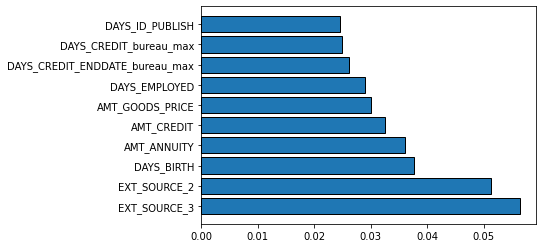

In [ ]:
plt.barh(list(feature_importances.feature[:10]), 
            feature_importances['importance_normalized'].head(10), 
            align = 'center', edgecolor = 'k')

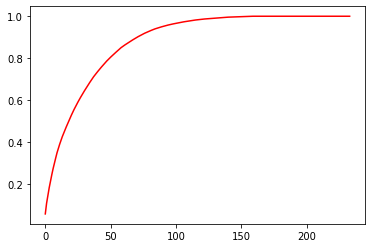

In [ ]:
plt.plot(list(range(len(feature_importances))), feature_importances['cumulative_importance'], 'r-')

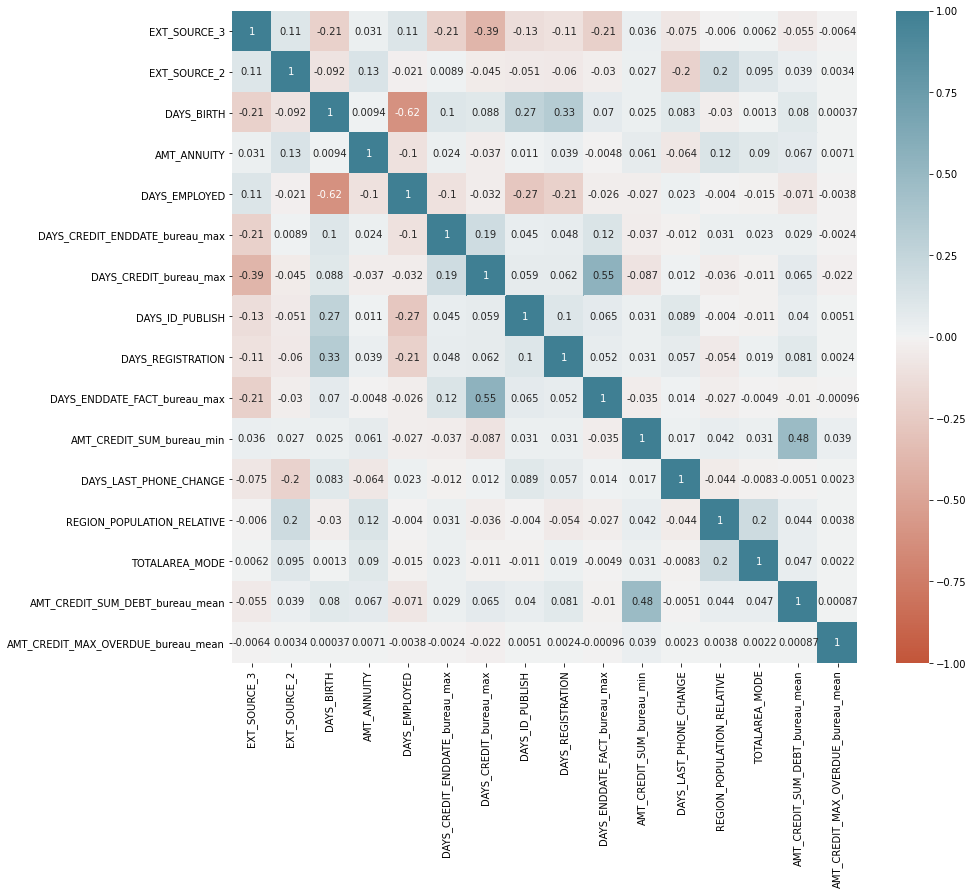

In [ ]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# features = train_cor_df['features']

fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(train[train.columns[:16]].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_CREDIT_ENDDATE_bureau_max,DAYS_CREDIT_bureau_max,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_ENDDATE_FACT_bureau_max,AMT_CREDIT_SUM_bureau_min,DAYS_LAST_PHONE_CHANGE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE,AMT_CREDIT_SUM_DEBT_bureau_mean,AMT_CREDIT_MAX_OVERDUE_bureau_mean,DAYS_CREDIT_ENDDATE_bureau_mean,AMT_INCOME_TOTAL,AMT_CREDIT_SUM_bureau_mean,DAYS_CREDIT_bureau_mean,AMT_CREDIT_SUM_bureau_max,DAYS_ENDDATE_FACT_bureau_mean,DAYS_CREDIT_bureau_min,DAYS_CREDIT_UPDATE_bureau_max,DAYS_ENDDATE_FACT_bureau_min,DAYS_CREDIT_ENDDATE_bureau_sum,CODE_GENDER_F,AMT_CREDIT_SUM_bureau_sum,DAYS_CREDIT_UPDATE_bureau_sum,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_UPDATE_bureau_min,NAME_EDUCATION_TYPE_Higher education,AMT_CREDIT_SUM_LIMIT_bureau_mean,HOUR_APPR_PROCESS_START,SK_ID_CURR
0,0,0.546023,0.573905,-15877.0,24876.0,-1235.0,893.0,-308.0,-3295.0,-4544.0,-348.0,39946.50,-776.0,0.018850,0.0691,42363.1125,0.0,-156.000000,148500.0,196213.660625,-1067.000000,450000.0,-937.2,-1861.0,-19.0,-1471.0,-448.0,1.0,967338.0,-2210.0,1.0,-1073.0,0.0,0.0,12.0,278362.5
1,1,0.379100,0.440381,-14282.0,25263.0,-1034.0,1064.0,-221.0,-2797.0,-4056.0,-316.0,35318.25,-594.0,0.018634,0.0617,67102.8750,0.0,94.716667,135000.0,187143.499688,-835.333333,450000.0,-806.0,-1469.0,-15.0,-1201.0,207.0,1.0,900000.0,-1537.0,2.0,-835.0,0.0,0.0,12.0,276291.0


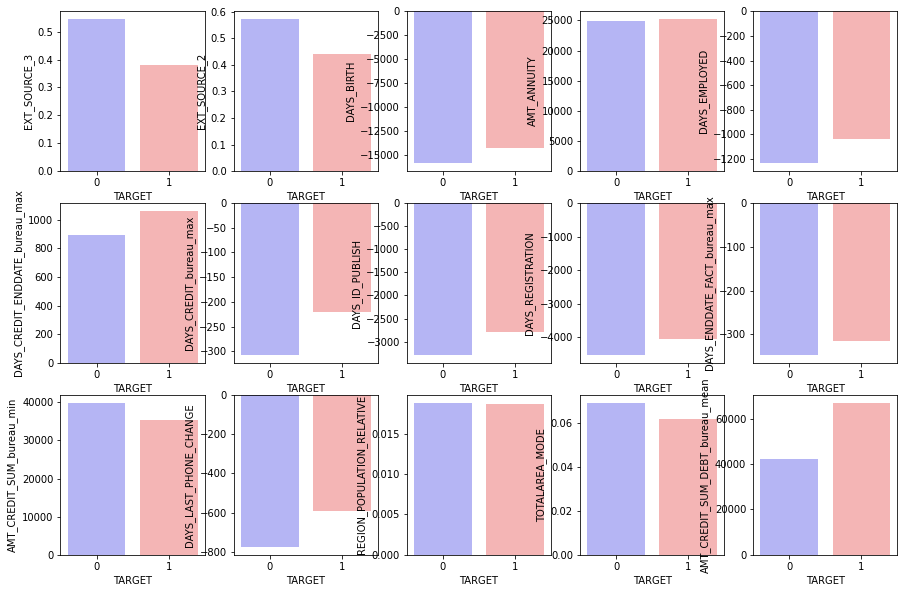

In [ ]:
# target 별 feature 분석
central = train.groupby('TARGET').median().reset_index()
display(central)

fig, ax = plt.subplots(3,5, figsize=(15,10))

ax = ax.ravel()
position = 0

for i in train.columns[:15]:
    sns.barplot(data=central, x='TARGET', y=i, ax=ax[position], palette='bwr')
    position += 1
    
plt.show()

> **1.8. 최종 train, test set 반출**

In [ ]:
print('Training shape: ', train_small.shape)
print('Testing shape: ', test_small.shape)

Training shape:  (307511, 92)
Testing shape:  (48744, 91)


In [ ]:
train_small.to_csv('train_small.csv', index = False)

In [ ]:
test_small.to_csv('test_small.csv', index = False)

In [ ]:
feature_importances.to_csv('feature_importances.csv', index = False)

scorecard 용

In [ ]:
# 누적 중요도가 threshold 미만인 Feature 만 select
threshold_select = 0.7

features_to_keep = list(feature_importances[feature_importances['cumulative_importance'] < threshold_select]['feature']) 
train_small2 = train_1[features_to_keep + ['TARGET','SK_ID_CURR']]
test_small2 = test_1[features_to_keep + ['SK_ID_CURR']]

In [ ]:
features_to_keep

In [ ]:
train_small2.to_csv('train_small2.csv', index = False)
test_small2.to_csv('test_small2.csv', index = False)